In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [2]:
#use usecols() to specify which column to read into dataset
mpg = pd.read_csv('datasets/mpg/mpg.csv', usecols = ['mpg','horsepower','cylinders','weight','origin'])

In [3]:
mpg.head()

,mpg,cylinders,horsepower,weight,origin
0,18.0,8,130,3504,USA
1,15.0,8,165,3693,USA
2,18.0,8,150,3436,USA
3,16.0,8,150,3433,USA
4,17.0,8,140,3449,USA


In [4]:
#descriptive statistics
mpg.describe()

,mpg,cylinders,horsepower,weight
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184
std,7.805007,1.705783,38.491160,849.402560
min,9.000000,3.000000,46.000000,1613.000000
25%,17.000000,4.000000,75.000000,2225.250000
50%,22.750000,4.000000,93.500000,2803.500000
75%,29.000000,8.000000,126.000000,3614.750000
max,46.600000,8.000000,230.000000,5140.000000


In [6]:
#count categorical variable 'origin'
pd.crosstab(index = mpg['origin'], columns = 'count')

col_0,count
origin,
Asia,79
Europe,68
USA,245


In [8]:
#to make a two way frequency table set columns to another categorical variable
pd.crosstab(index=mpg['origin'], columns = mpg['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
Asia,4,69,0,6,0
Europe,0,61,3,4,0
USA,0,69,0,73,103


In [11]:
#descriptive statistics for each level of origin
mpg.groupby('origin').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Asia,79.0,30.450633,6.090048,18.0,25.70,31.6,34.050,46.6
Europe,68.0,27.602941,6.580182,16.2,23.75,26.0,30.125,44.3
USA,245.0,20.033469,6.440384,9.0,15.00,18.5,24.000,39.0


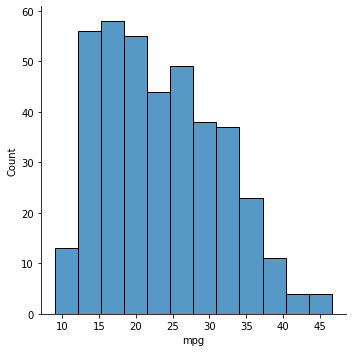

In [12]:
#visualize overall distribution of origin
sns.displot(x='mpg', data=mpg)

Text(0.5, 1.0, 'mpg across each origin')

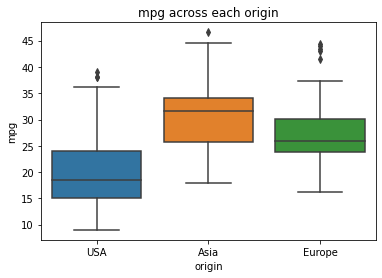

In [13]:
#visualize boxplot comparing mpg and each level of origin
sns.boxplot(x='origin',y='mpg',data=mpg)
plt.title('mpg across each origin')

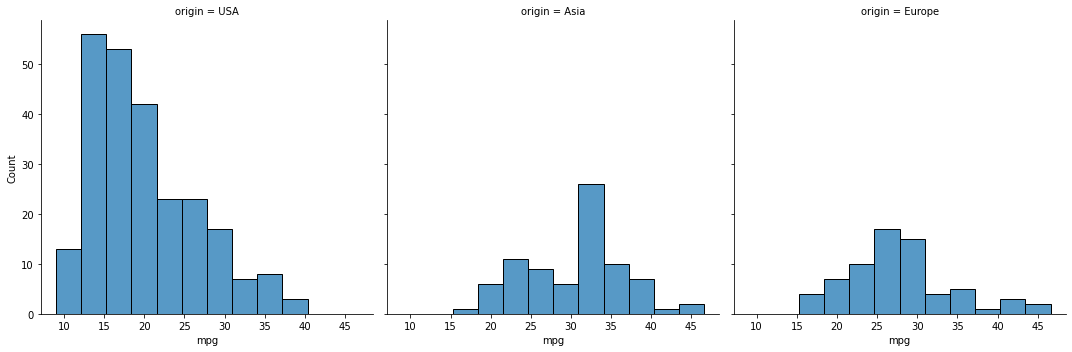

In [17]:
#visualize distribution of mpg across origin using a faceted histogram
sns.displot(x='mpg', data = mpg,  col = 'origin')

In [18]:
#filter out cars in usa
usa_cars = mpg[mpg['origin'] == 'USA']

In [19]:
#filter out cars in europe
europe_cars = mpg[mpg['origin'] == 'Europe']

In [21]:
#test statistics
stats.ttest_ind(usa_cars['mpg'],europe_cars['mpg'])

Ttest_indResult(statistic=-8.534455914399228, pvalue=6.306531719750568e-16)

In [23]:
#correlation matrix for continuous variables
mpg[['horsepower', 'mpg','weight']].corr()

,horsepower,mpg,weight
horsepower,1.000000,-0.778427,0.864538
mpg,-0.778427,1.000000,-0.832244
weight,0.864538,-0.832244,1.000000


Text(0.5, 1.0, 'relationship between weight and mileage')

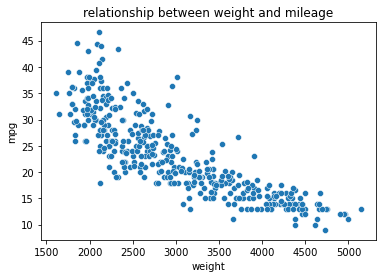

In [25]:
#visualize relationship between weight and mpg
sns.scatterplot(x='weight', y='mpg', data = mpg)
plt.title('relationship between weight and mileage')

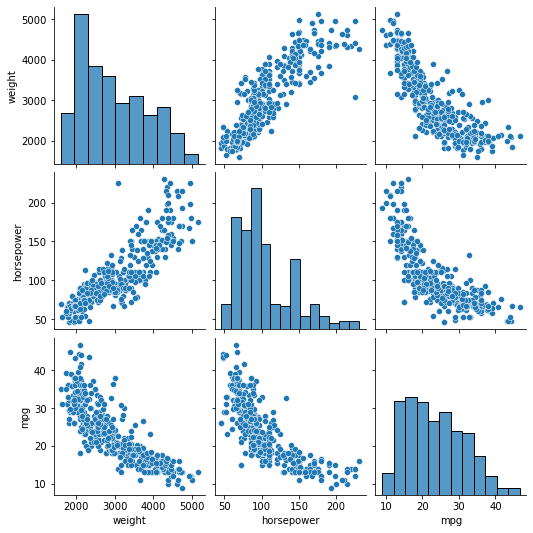

In [26]:
#pairplot for all combinations
sns.pairplot(mpg[['weight','horsepower','mpg']])

In [27]:
#linear regression of weight on mpg
stats.linregress(x=mpg['weight'],y=mpg['mpg'])

LinregressResult(slope=-0.007647342535779578, intercept=46.21652454901758, rvalue=-0.8322442148315754, pvalue=6.015296051435726e-102, stderr=0.0002579632782734318, intercept_stderr=0.7986724633128348)

Text(0.5, 1.0, 'Relationship between weight and mileage')

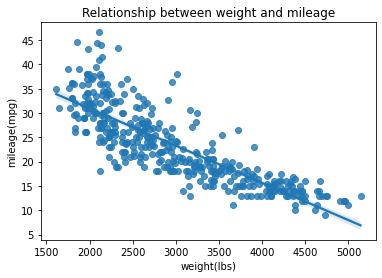

In [30]:
#fit regression line to scatter plot
sns.regplot(x='weight', y = 'mpg', data = mpg)
plt.xlabel('weight(lbs)')
plt.ylabel('mileage(mpg)')
plt.title('Relationship between weight and mileage')

In [32]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(mpg[['weight']],mpg[['mpg']],random_state=1234)

In [33]:
x_train.shape

(294, 1)

In [34]:
x_test.shape

(98, 1)

In [36]:
#create linear regression object
regr = linear_model.LinearRegression()

In [37]:
#train the model using the training dataset
regr.fit(x_train,y_train)

LinearRegression()

In [38]:
#make predictions using the testing set
y_pred = regr.predict(x_test)

In [39]:
#print first five observations
y_pred[:5]

array([[14.86634263],
       [23.48793632],
       [26.2781699 ],
       [27.69989655],
       [29.05319785]])

In [41]:
#return the coefficient of our test model
regr.coef_

array([[-0.00760282]])

In [43]:
#get the rsquared
metrics.r2_score(y_test,y_pred)

0.6811923996681358

In [44]:
#get the RMSE
metrics.mean_squared_error(y_test,y_pred)

21.633480764366613